# Klassifizierung

Bei der Analyse von Daten kann die Identifikation von Klassen, d.h. Gruppen oder Cluster von Datenpunkten, welche änhliche Eigenschaften haben, sehr hilfreich sein. Diese Strategie wird häufig in Situationen eingesetzt, in welchen die Daten eine hohe Dimensionalität aufweisen und so Strukturen für den Menschen schwer zu erkennen sind.

Die folgende Abbildung zeigt ein Beispiel mit drei Gruppen von Datenpunkten, welche eine Nähe bzgl. der abhängigen Größen $\sf A$ und $\sf B$ haben. Die visuelle Erkennung der Gruppen ist in diesem Fall für Menschen im Allgemeinen sehr einfach.

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})

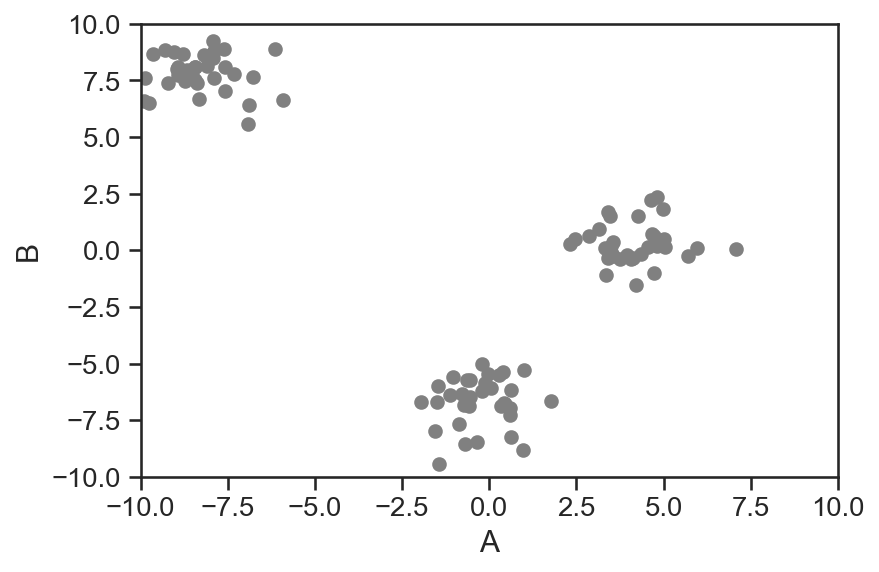

In [2]:
# Hier wird der nachfolgende Datensatz künstlich generiert. Die genutzte 
# Methode kommt aus dem Modul sklearn.datasets, siehe
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
# Durch die Festlegung der Zufallszahlfolge, mittels des Arguments
# random_state, wir so bei jedem Durchlauf der gleiche Datensatz generiert

import sklearn.datasets
x, c = sklearn.datasets.make_blobs(random_state=144)

plt.scatter(x[:,0], x[:,1], color='grey')

plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel("A")
plt.ylabel("B");

Im Folgenden werden zwei Verfahren vorgestellt, welche eine automatische Erkennung von Grupppen oder Clustern durchführen können.

## k-Means-Algorithmus

Bei dem [k-Means-Algorithmus](https://de.wikipedia.org/wiki/K-Means-Algorithmus) handelt es sich um ein Verfahren um $\sf k$ Punkte zu finden, welche als Zentren von Clustern interpretiert werden können. Für alle Datenpunkte, welche zu einem Clusterzentrum $\sf \vec{\mu}_i$ gehören, gilt, dass sie diesem am nächsten sind. Bestimmt werden die Zentren $\sf \vec{\mu}_i$ über die Minimierung der folgenden Abstandsfunktion $\sf J$ für alle Datenpunkte $\sf \vec{x}_j$

$$
\sf J = \sum_{i=1}^k\sum_{\text{alle}\ \vec{x}_j} \left| \vec{x}_j - \vec{\mu}_i\right|^2
$$

Der k-Means-Algorithmus weist ein sehr einfaches und effizientes Verfahren zur Bestimmung der Clusterzentren. 
1. Es werden $\sf k$ (zufällige) Clusterzentren vorgegeben.
2. Für jeden Datenpunkt $\sf \vec{x}_j$ wird das nächstgelegene Clusterzentrum bestimmt.
3. Die Clusterzentren werden in die Mittelpunkte der ihnen zugewiesenen Menge von Datenpunkten verschoben.

Die Schritte 2 und 3 werden solange wiederholt bis sich die Abstandsfunktion $\sf J$ nicht mehr ändert, oder ein anderes Abbruchkriterium erfüllt ist.

Das Pythonmodul `sklearn` bzw. das Untermodul [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) enthält die Implementierungen diverser Cluster-Algorithmen, unter anderem die der hier vorgestellten. Dazu muss zunächst das entsprechende Modul geladen werden und ein Objekt der Klasse [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) erstellt werden. 

In [3]:
import sklearn.cluster

kmeans = sklearn.cluster.KMeans(n_clusters=3)

Dabei wird die Anzahl der zu suchenden Cluster mittels des `n_clusters` Arguments festgelegt, hier sollen also drei Cluster identifiziert werden. Die Datenpunkte aus obiger Abbildung sind in der Variablen `x` als ein Array gespeichert und haben folgende Form.

In [4]:
print(x.shape)

(100, 2)


Es sind 100 Zahlenpaare, da in diesem Beispiel jeder Datenpunkt nur durch zwei Eigenschaften bestimmt ist. Diese Daten werden nun genutzt, um nach dem oben aufgeführten Algorithmus die drei Clusterzentern zu finden. Dazu wird die Methode `fit()` aufgerufen, welche die Datenpunkte übergeben bekommt.

In [5]:
res = kmeans.fit(x)

Das `KMeans` Objekt enthält nun alle Informationen, wie z.B. die Positionen der Clusterzentren (`cluster_centers_`) oder die Zuweisung (`labels_`) jedes Datenpunktes zu einem Zentrum. 

In [6]:
print(kmeans.cluster_centers_)

[[-8.25846604  7.81152655]
 [-0.25037619 -6.68466571]
 [ 4.15911301  0.32194317]]


In [7]:
print(kmeans.labels_)

[2 1 2 1 1 2 1 1 1 0 1 0 1 1 2 0 0 0 0 1 1 0 0 2 1 0 1 1 1 1 1 0 1 0 2 0 1
 0 0 2 2 1 2 0 0 0 2 0 2 2 2 0 1 0 2 1 1 0 0 1 0 0 2 2 2 2 2 0 2 1 0 2 0 1
 2 2 2 0 1 1 1 0 2 0 1 1 1 2 2 2 0 2 2 1 2 0 2 0 0 2]


Die folgende Graphik zeigt die Datenpunkte, weche je nach Clusterzugehörigkeit eingefärbt sind, und die Zentren der Cluster.

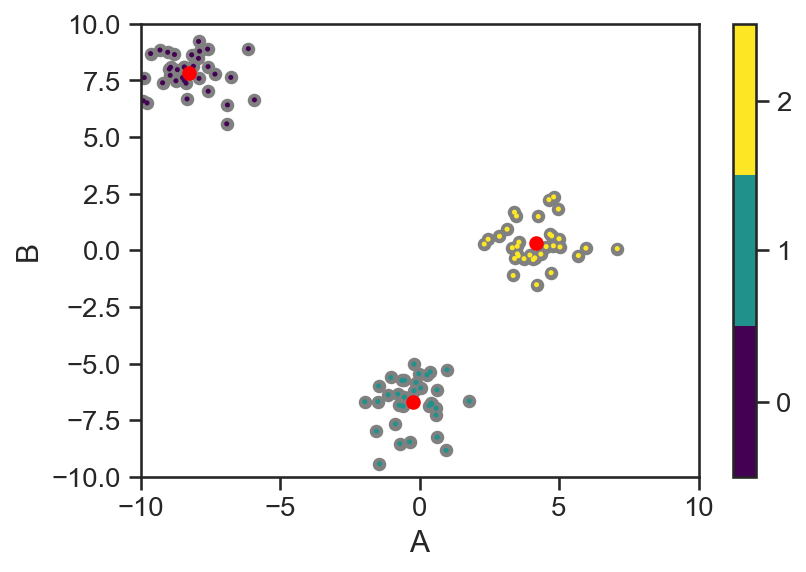

In [8]:
# In grau werden die Datenpunkte gezeichnet
plt.scatter(x[:,0], x[:,1], color='grey', s=30)

# Im folgenden wird eine Farbskala mit nur drei Werten erzeugt, dies dient nur der 
# besseren Darstellung
cmap3 = plt.cm.get_cmap('viridis', 3)

# Nun werden die Datenpunkte nochmals gezeichnet, jedoch kleiner als die grauen Punkte 
# und mit der Clusterzugehörigkeit, hier 0, 1 oder 2, eingefärbt
sct = plt.scatter(x[:,0], x[:,1], c=kmeans.labels_, s=2, cmap=cmap3)

# In rot werden die Clusterzentren dargestellt
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red')

# Achsenbeschriftung und Ausdehnung
plt.xlabel("A")
plt.ylabel("B")
plt.xlim([-10,10])
plt.ylim([-10,10])

# Diskrete Farbskala
cb = plt.colorbar(sct)
labels = [0,1,2]
loc = [0.33, 1, 1.66]
cb.set_ticks(loc)
cb.set_ticklabels(labels)

Neben der expliziten Zuweisung der vorhandenen Datenpunkte, ist es möglich eine Vorhersage über die Zuordnung anderer Punkte zu machen. Somit kann beispielsweise eine Karte erstellt werden, welche den gesamten Bereich entsprechend kennzeichnet.

In [9]:
# Generierung eines zweidimensionalen Datenpunktgitters
sxy = np.linspace(-10, 10, 1000)
mx, my = np.meshgrid(sxy, sxy)

# Vorhersage der Punktzugehörigkeit für die einzelnen Datenpunkte
# des Punktgitters
z = kmeans.predict(np.c_[mx.ravel(), my.ravel()])

# Umwandlung der Zugehörigkeiten in die gleiche Form wie das Gitter
z = z.reshape(mx.shape)

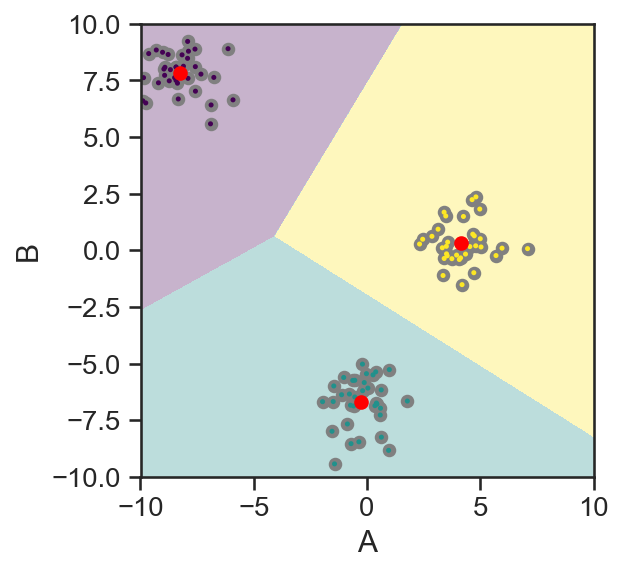

In [10]:
# Darstellung der Karte der Vorhergesagten Zugehörigkeiten
plt.imshow(z, cmap=cmap3, extent=[-10,10,-10,10], origin='lower', alpha=0.3)

# Darstellung der Datenpunkte und Clusterinformationen
plt.scatter(x[:,0], x[:,1], color='grey', s=30)
plt.scatter(x[:,0], x[:,1], c=kmeans.labels_, s=2, cmap=cmap3)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red')

# Beschriftungen 
plt.xlabel("A")
plt.ylabel("B")
plt.xlim([-10,10])
plt.ylim([-10,10]);